# Comparing GEP results
For each country, results are defined by the geographic and secnario summary files. In this script, results are downloaded, extracted, and analyzed to see how the scenarios affect results

In [21]:
import os, sys, importlib, shutil, zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import GEP
from GEP import gepResults

scenarioDefs = {
               0:[["Baseline","High"], "Population Growth"],
               1:[["Baseline","Low", "High"], "Electricity demand targer"],
               2:[["Baseline","Best Practice"], "5-year investment plan"],
               3:[["Baseline","High"], "Grid generation cost"],
               4:[["Baseline","High"], "PV Cost"],
               5:[["Baseline","High"], "Prioritization"],
               }

In [4]:
resultsFolder = "/media/gost/DATA1/GEP/Summaries/"
shapesFolder = "/media/gost/DATA1/GEP/Clusters"
outFolder = "/media/gost/DATA1/GEP/Summaries_Summary"
chart_folder = "/media/gost/DATA1/GEP/CHARTS/Africa"

In [5]:
# Create summary output table containing all the summary files stacked together
resultsFolder = "/media/gost/DATA1/GEP/Summaries/"
all_results = []
for root, dirs, files in os.walk(resultsFolder):
    for f in files:
        if "summary.csv" in f:
            all_results.append(os.path.join(root, f))

In [6]:
class gep_summary(object):
    def __init__(self, file):
        self.file = file
        self.file_name = os.path.basename(file)
        self.country = self.file_name[:4]
        self.scenario = self.file_name[5:16]
    
    def get_data(self):
        self.summary_data = pd.read_csv(self.file)
        self.summary_data['Country'] = self.country
        self.summary_data['Scenario'] = self.scenario
        return(self.summary_data)

    def __str__(self):
        return(f'{self.country} : {self.scenario}')

for x in all_results:
    xx = gep_summary(x)
    tempD = xx.get_data()
    try:
        final = final.append(tempD)
    except:
        final = tempD
final.columns = ['Attribute','2025','2030','Country','Scenario']

In [7]:
def extract_plot(joined_data, selected_attribute, selected_scenario, title, plot=True):
    selected_index = [x for x in joined_data.index if (x[0][:1] == selected_attribute and x[1] == selected_scenario)]
    selected_data = joined_data.loc[selected_index]
    data_bad_idx = selected_data['2025'] == selected_data['2030']
    selected_data = selected_data[~data_bad_idx]
    if plot:
        xLabels = [x[0][2:] for x in selected_index]
        figure_title = xLabels[0].split("_")[0]

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
        selected_plot = selected_data.plot.bar(rot=30, ax=axes[0], title=f"{title} - Normal")
        selected_plot.set_xticklabels(xLabels)
        selected_plot.set_xlabel(f'Scenario - {selected_scenario}')

        logged_plot = selected_data.plot.bar(rot=30, ax=axes[1], logy=True, title=f"{title} - Logged")
        logged_plot.set_xticklabels(xLabels)
        logged_plot.set_xlabel(f'Scenario - {selected_scenario}')
        fig.savefig(f"{chart_folder}_{selected_scenario}_{title}_{figure_title}.png")
    return(selected_data)

In [8]:
EAPP = [f'{x}-1' for x in ['bi','dj','eg','et','ke','ly','rw','sd','ss','ug']]
WAPP = [f'{x}-1' for x in ['bf','bj','ci','gh','gm','gn','gw','lr','ml','ng','sl','sn','tg']]
SAPP = [f'{x}-1' for x in ['ao','bw','ls','mw','mz','na','sz','tz','za','zm','zr','zw']]

In [ ]:
# Group data to generate country summary tables
joined_data = pd.DataFrame(final.groupby(['Attribute','Scenario']).sum())
wapp_data = pd.DataFrame(final[final['Country'].isin(WAPP)].groupby(['Attribute','Scenario']).sum())
eapp_data = pd.DataFrame(final[final['Country'].isin(EAPP)].groupby(['Attribute','Scenario']).sum())
sapp_data = pd.DataFrame(final[final['Country'].isin(SAPP)].groupby(['Attribute','Scenario']).sum())

In [ ]:
# Create plots describing all costs for all separate scenarios
attributes = joined_data.index.get_level_values(0)
scenarios = joined_data.index.get_level_values(1)
for selected_attribute in ['1','2','3','4']:
    for selected_scenario in scenarios:
        if selected_scenario[-1] == '0':
            extract_plot(joined_data, selected_attribute, selected_scenario, title="Africa")
            extract_plot(wapp_data, selected_attribute, selected_scenario, title="WAPP")
            extract_plot(eapp_data, selected_attribute, selected_scenario, title="EAPP")
            extract_plot(sapp_data, selected_attribute, selected_scenario, title="SAPP")
            break

In [50]:
inD.head()

,Attribute,2025,2030,Country,Scenario,Attribute_Num,bad_model,2030_Log
0,1.Population_Grid,2.798588e+06,3.863232e+06,bi-1,0_0_0_0_0_0,1,0,15.167015
2,1.Population_SA_PV,5.750582e+06,1.193562e+07,bi-1,0_0_0_0_0_0,1,0,16.295038
8,2.New_Connections_Grid,1.789148e+06,1.064645e+06,bi-1,0_0_0_0_0_0,2,0,13.878152
10,2.New_Connections_SA_PV,5.750582e+06,6.185036e+06,bi-1,0_0_0_0_0_0,2,0,15.637643
16,3.Capacity_Grid,3.818306e+04,2.582751e+04,bi-1,0_0_0_0_0_0,3,0,10.159195


/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


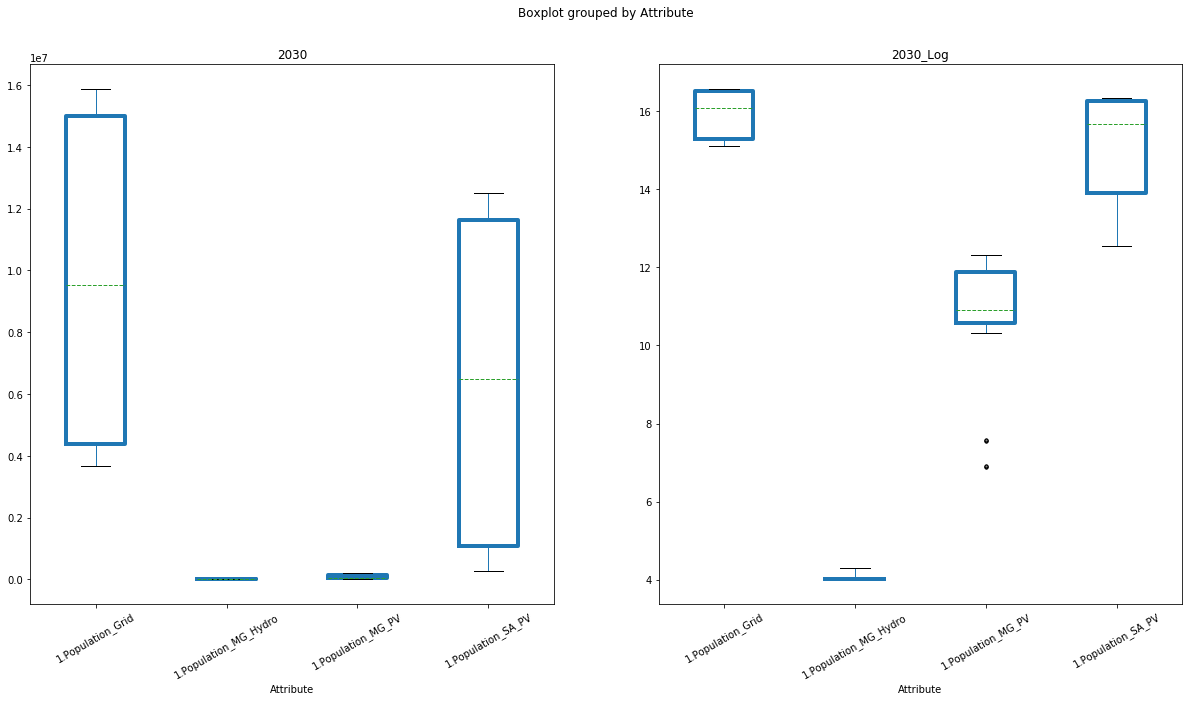

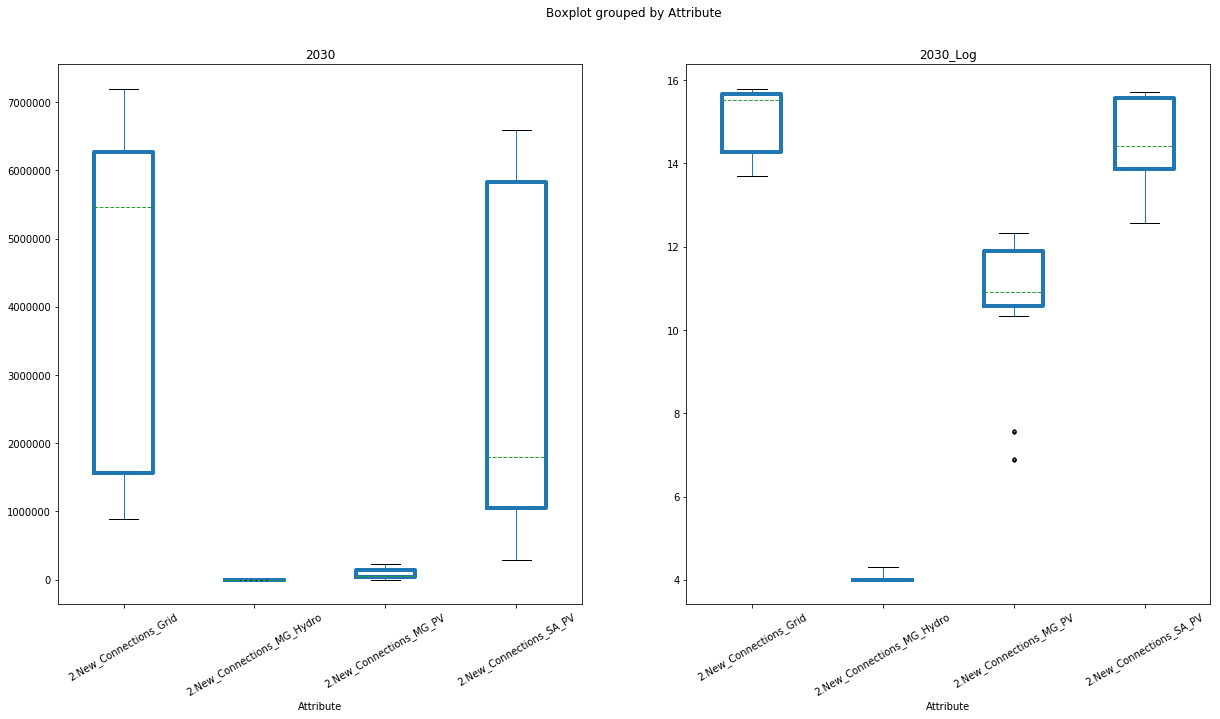

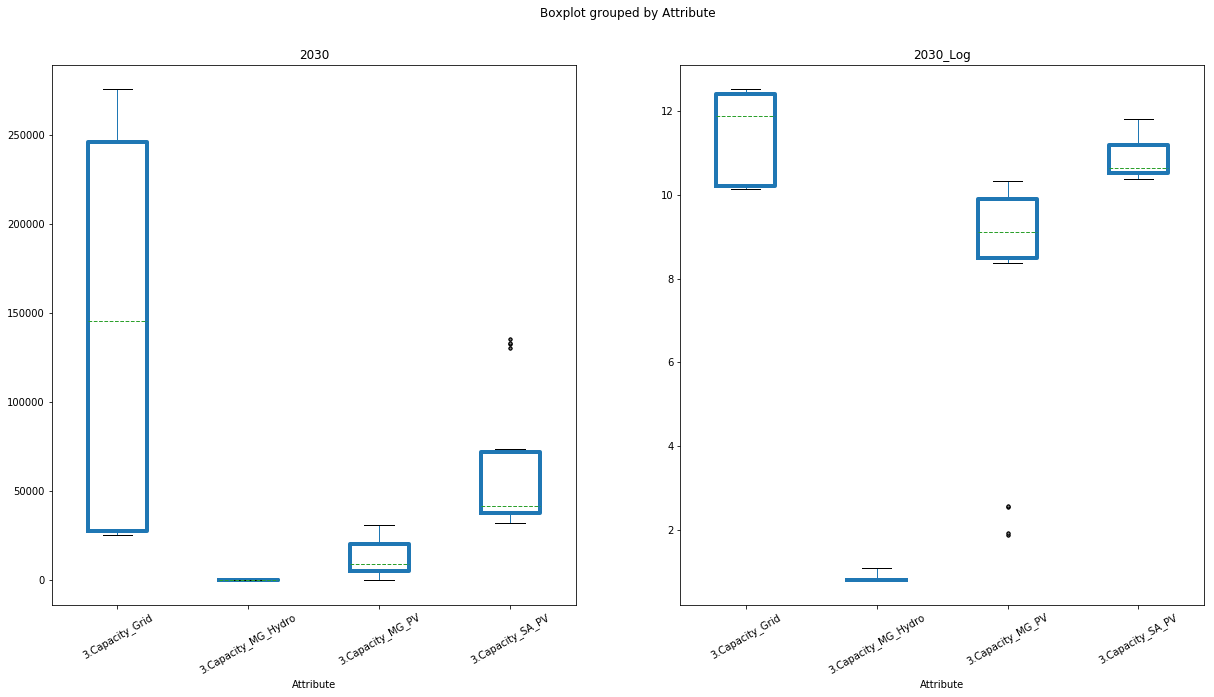

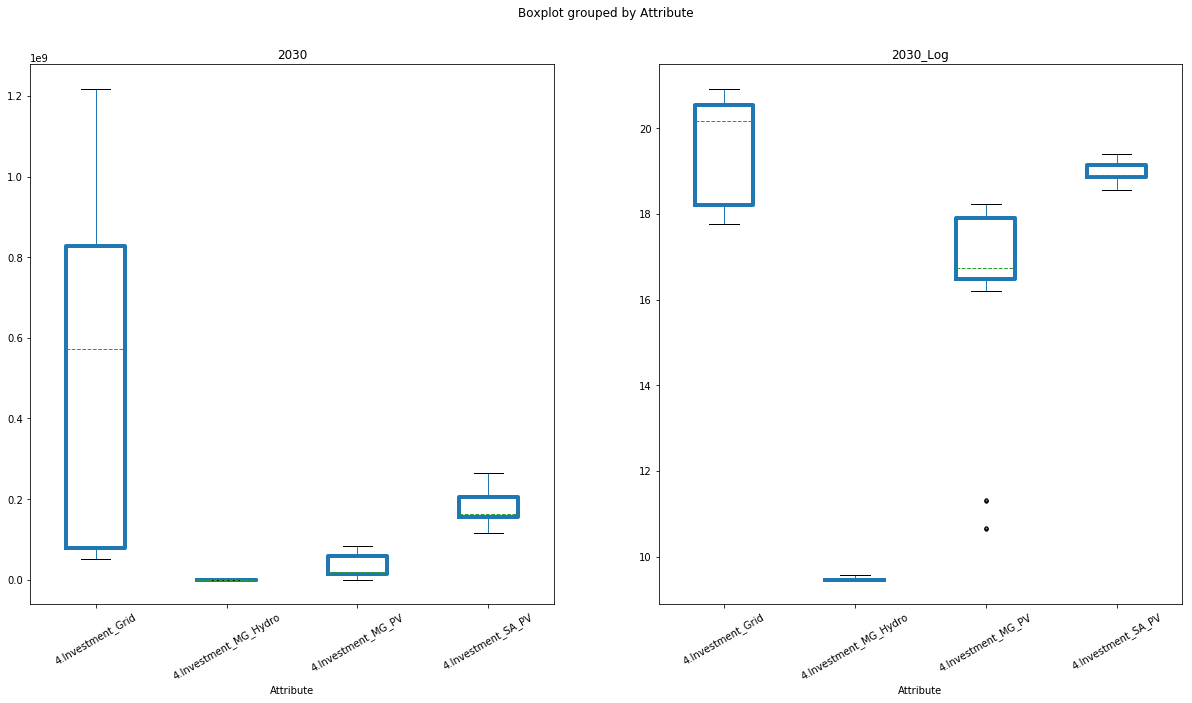

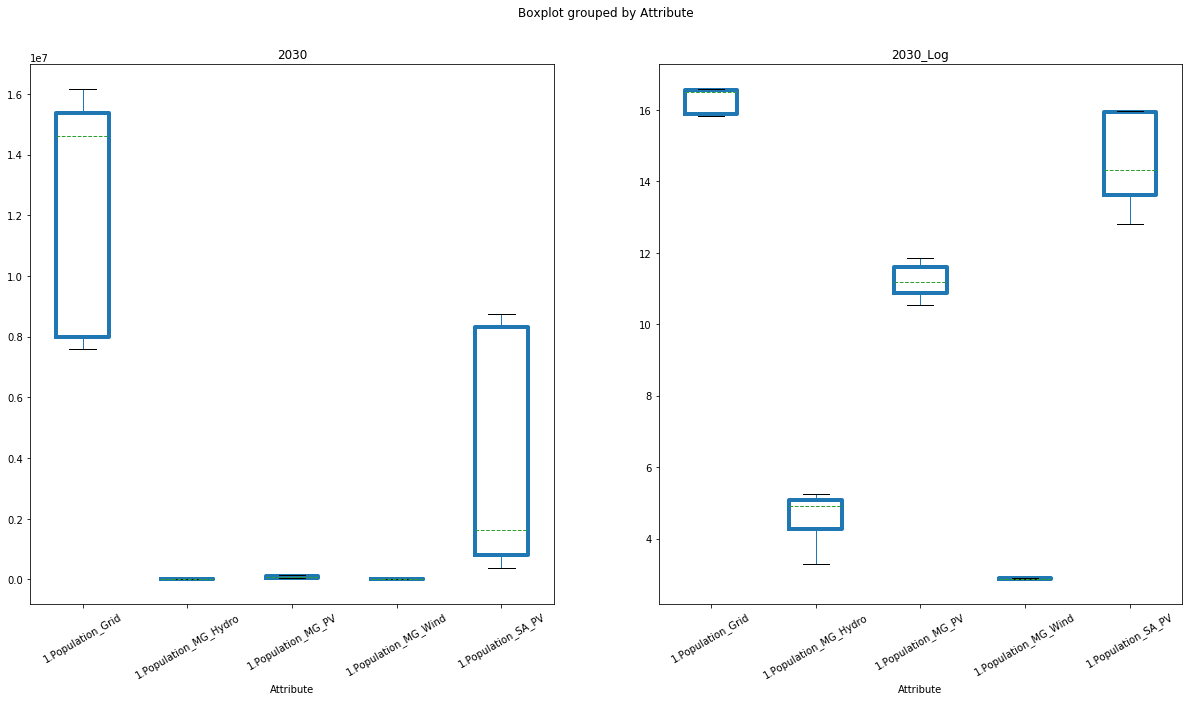

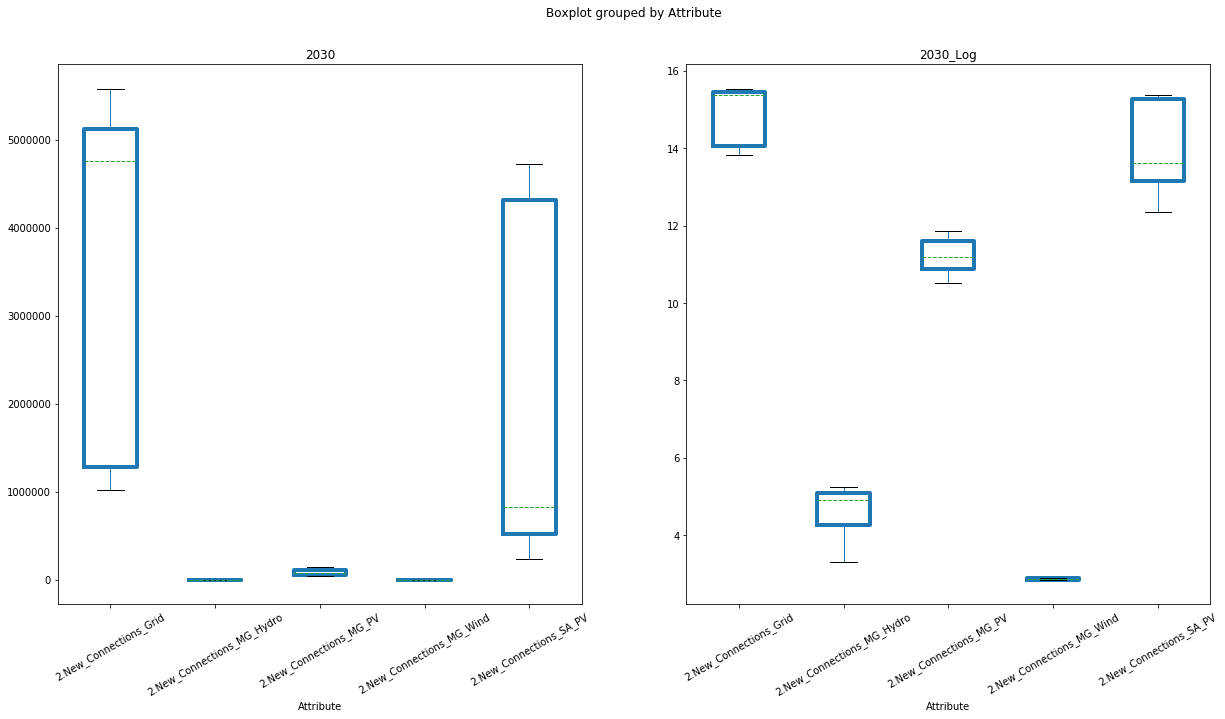

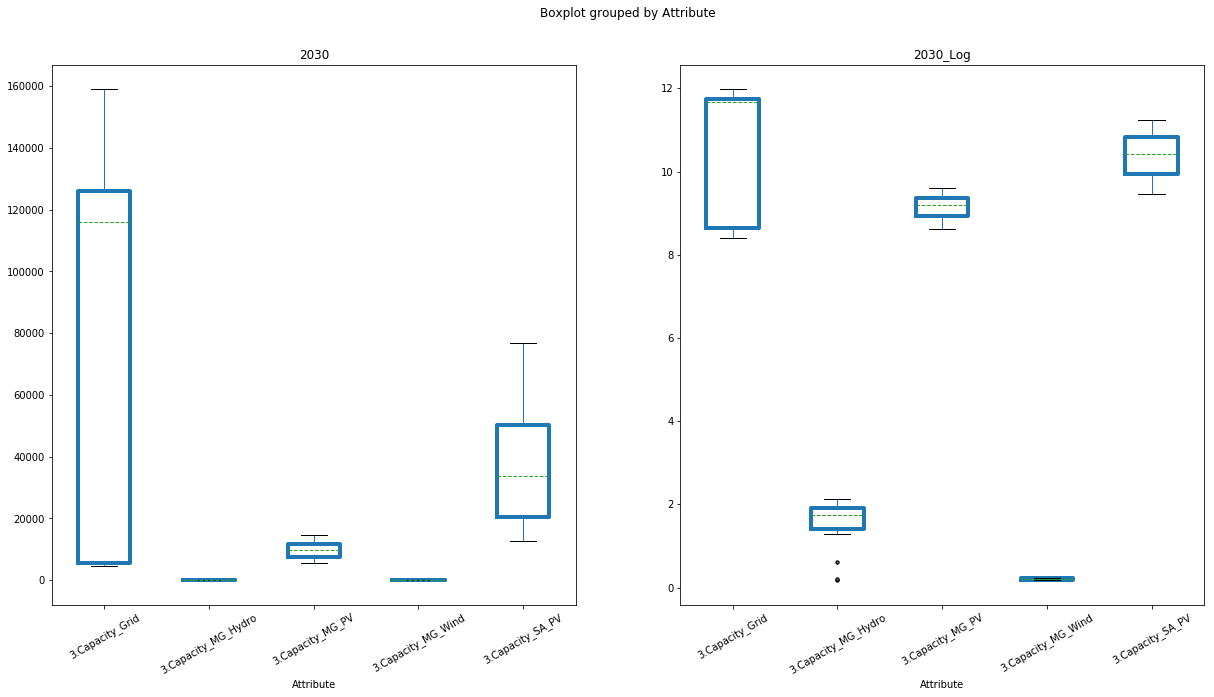

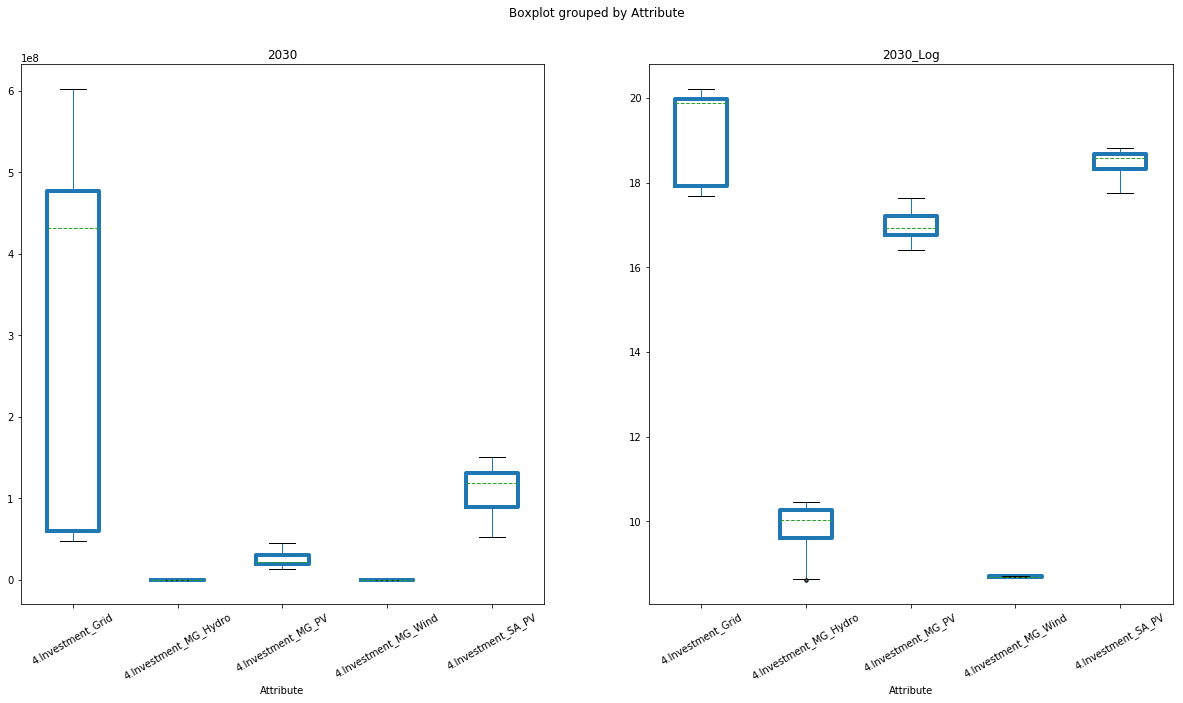

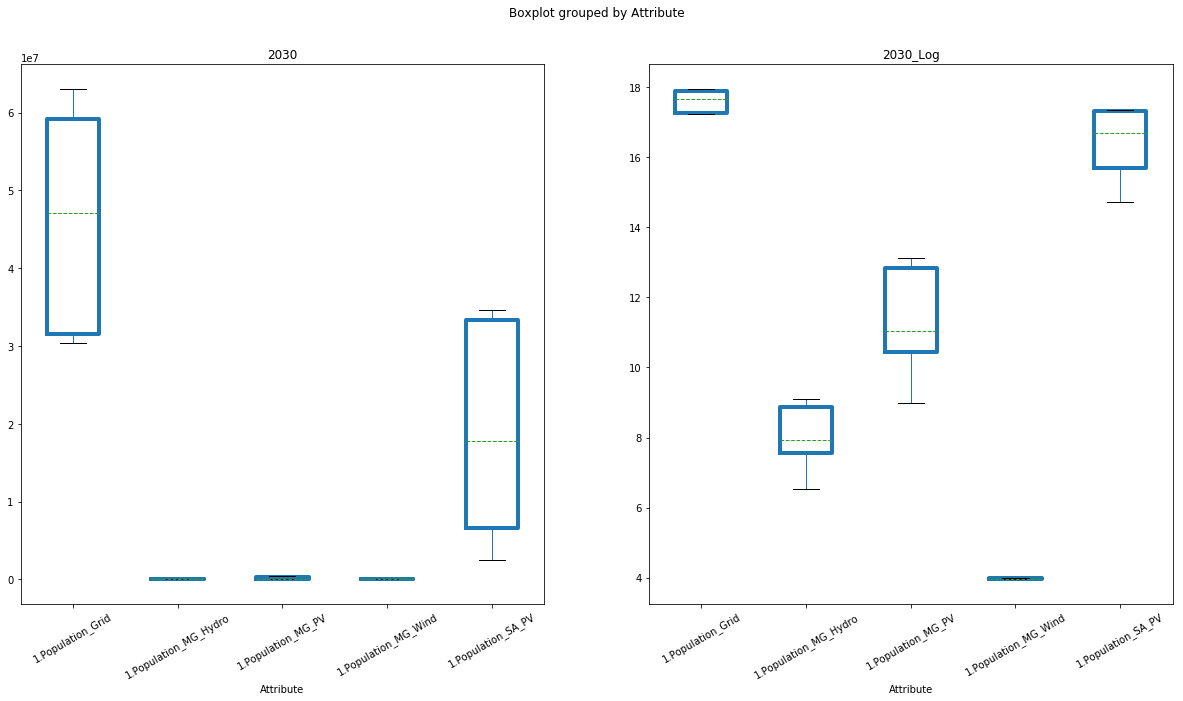

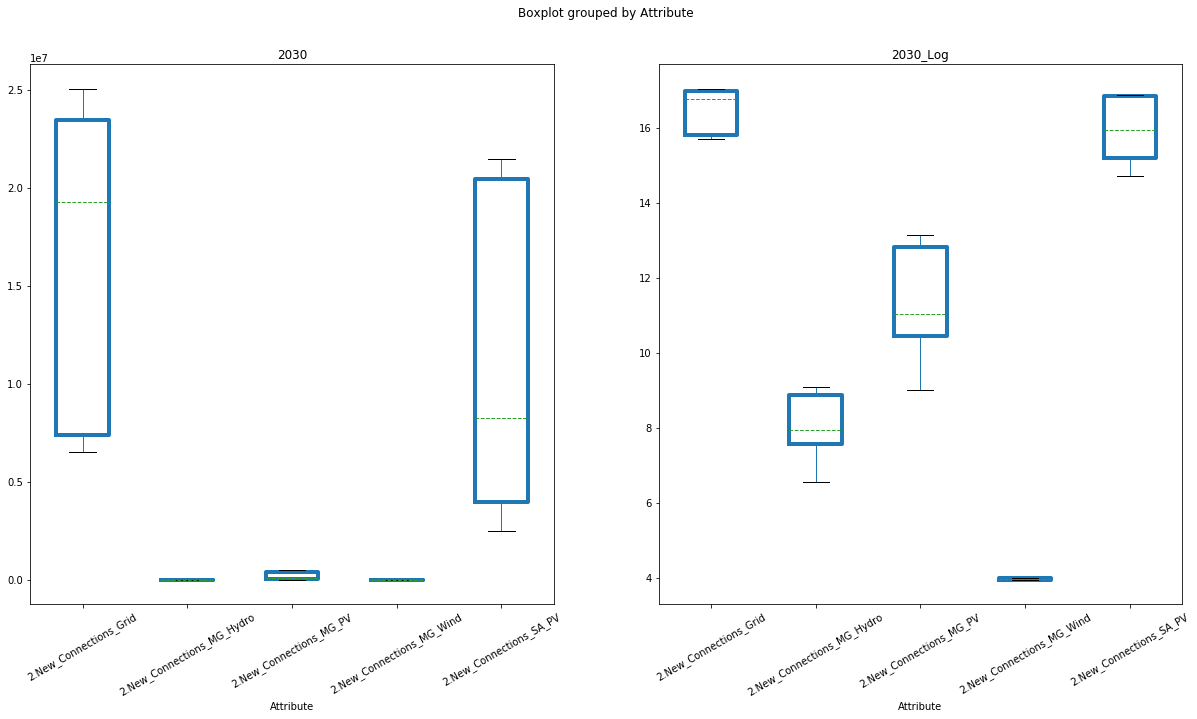

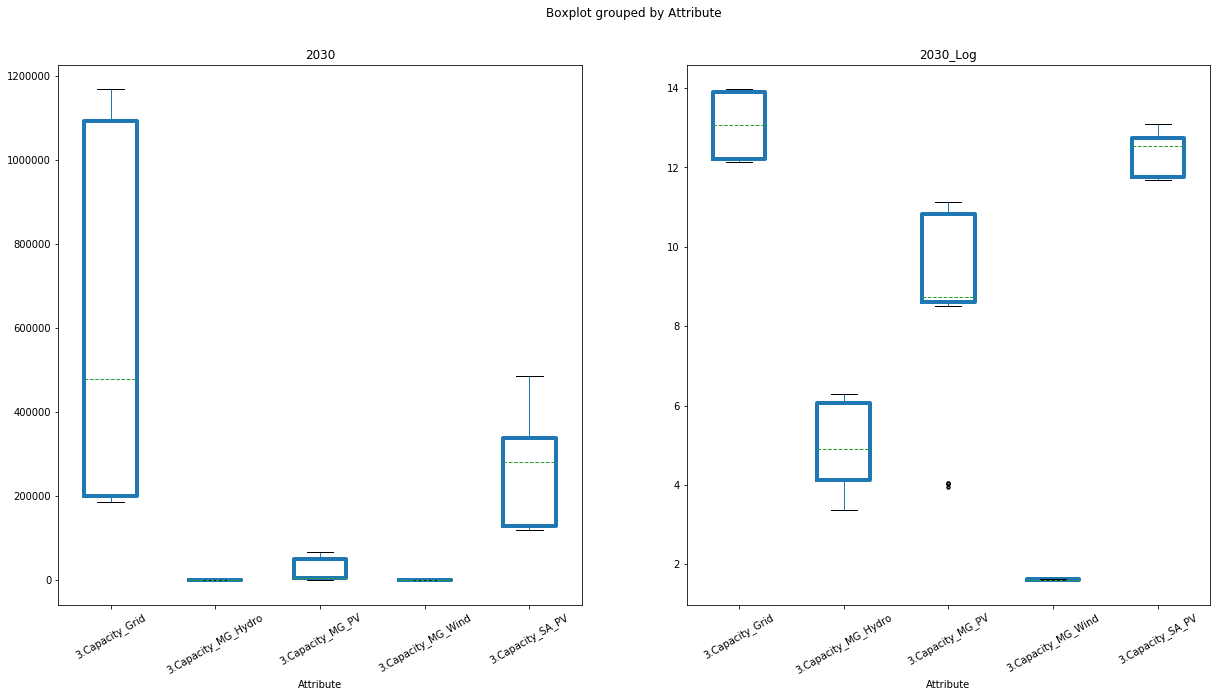

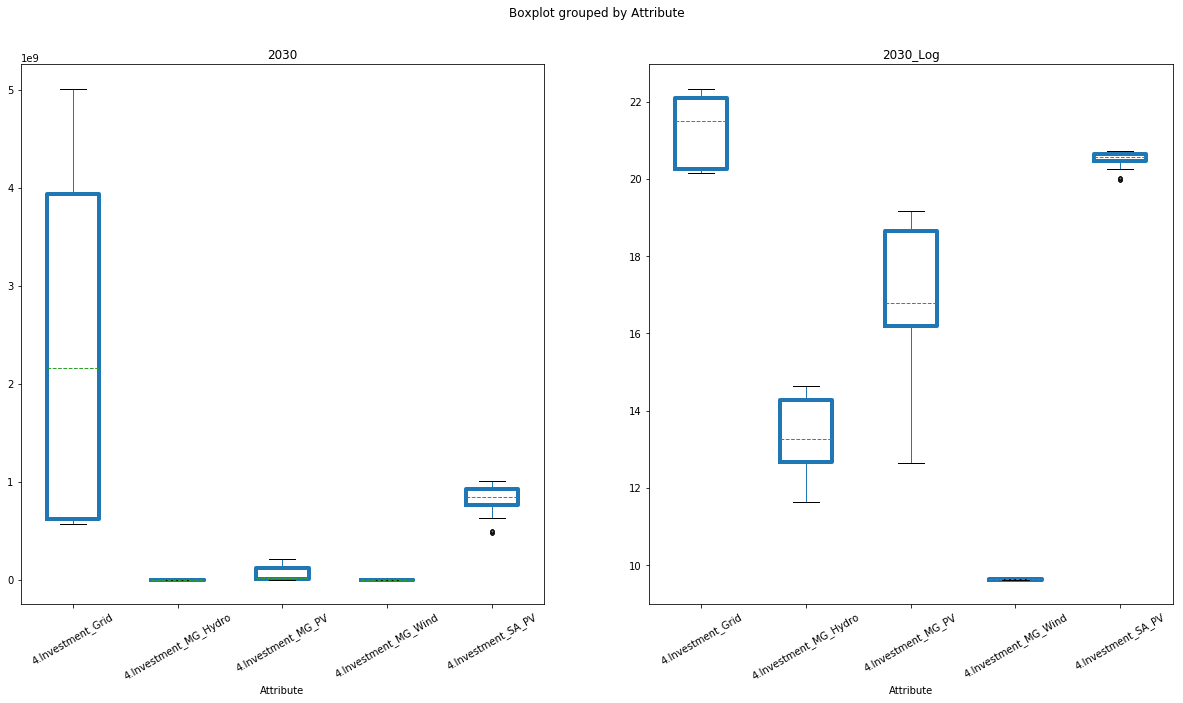

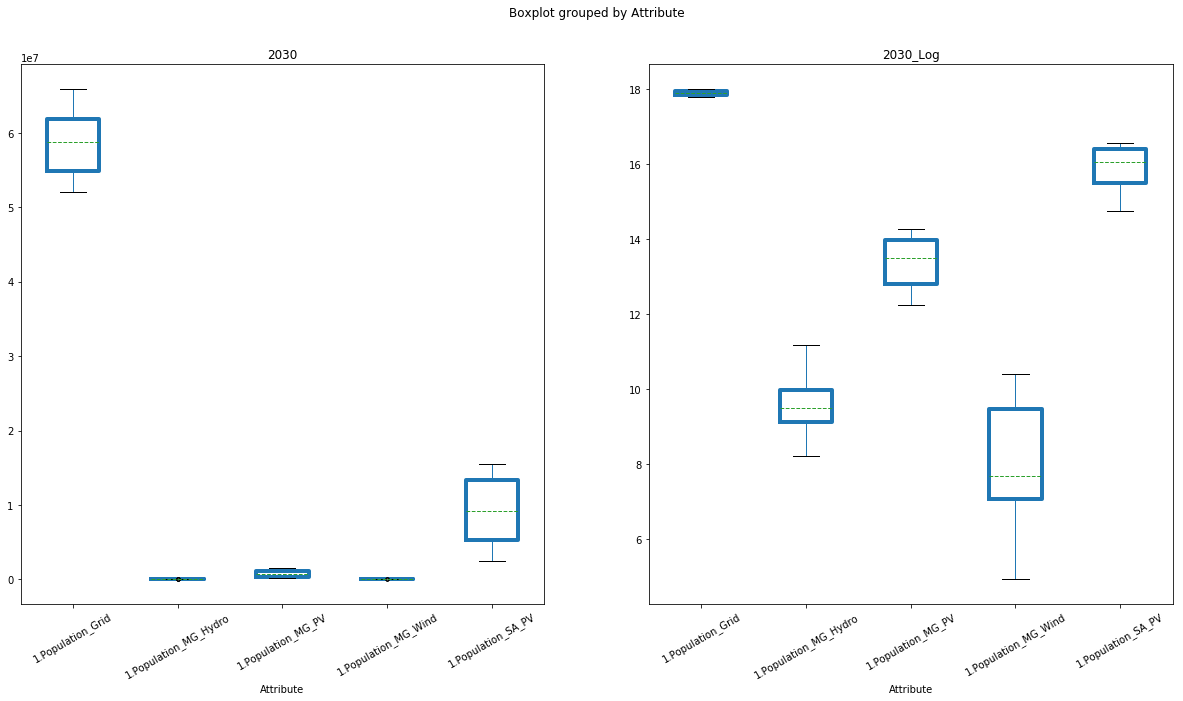

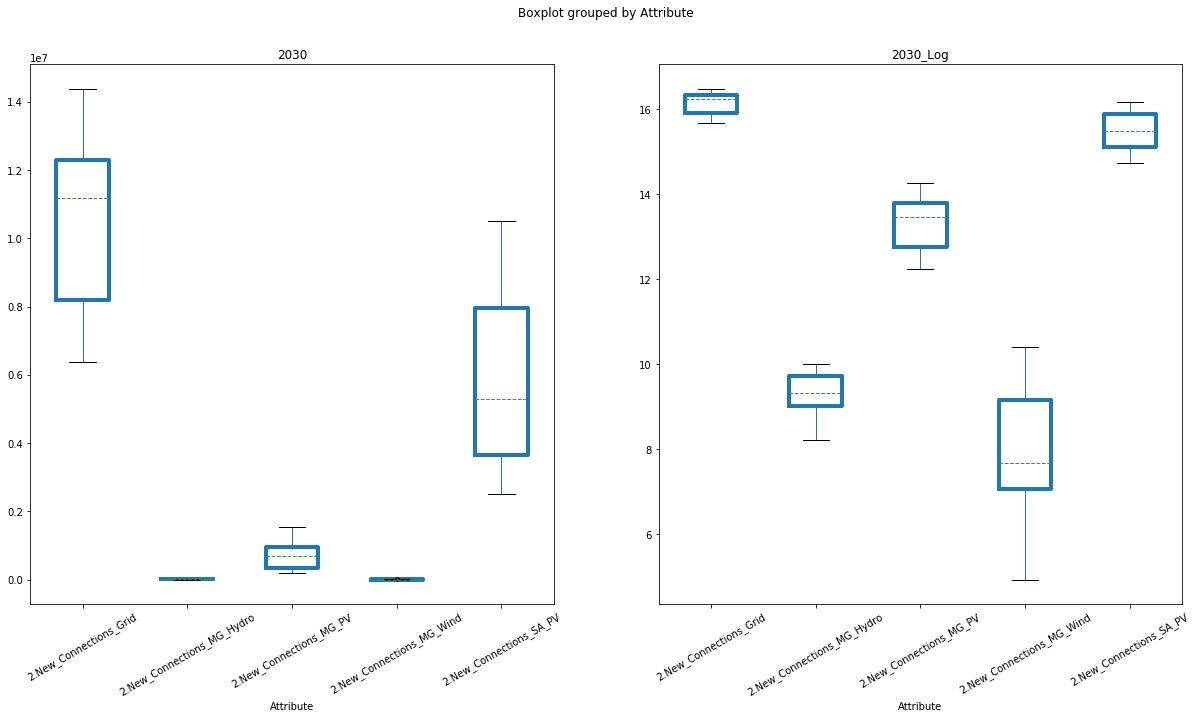

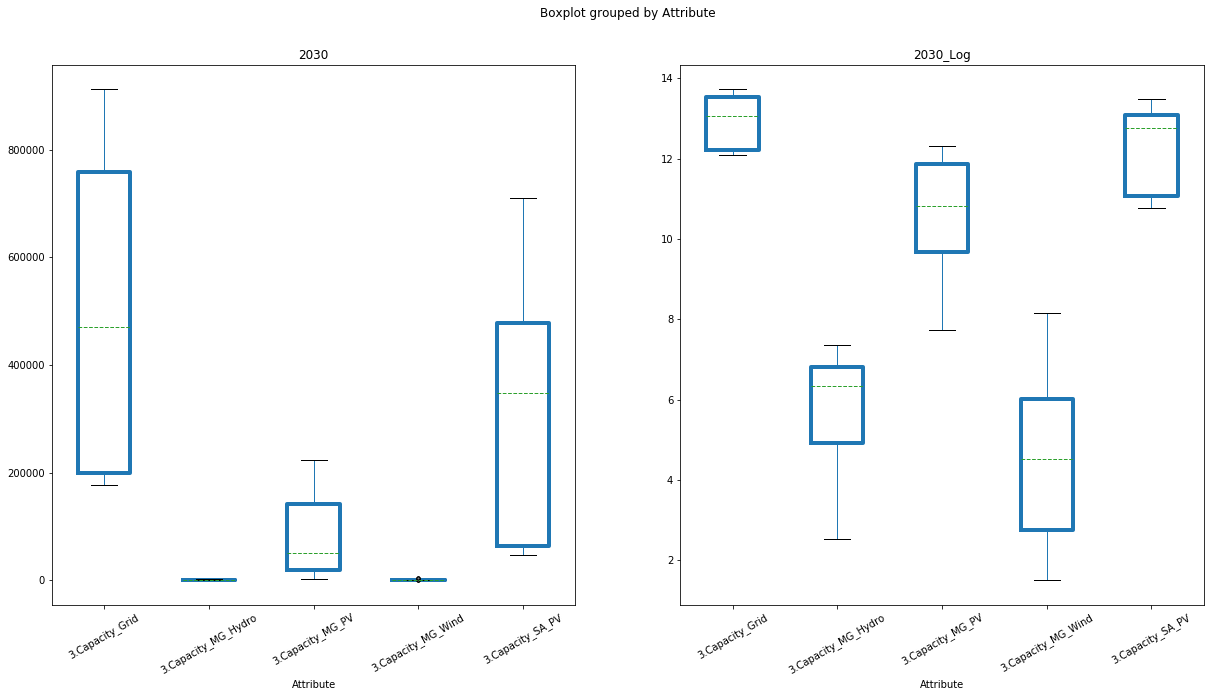

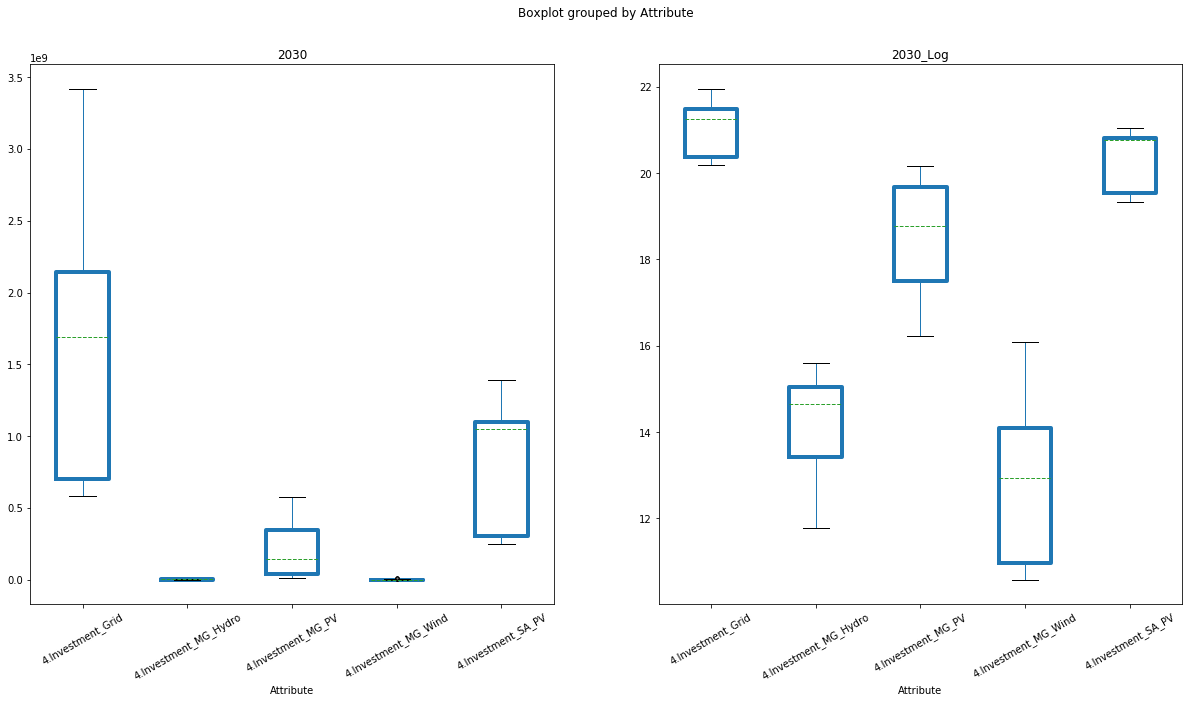

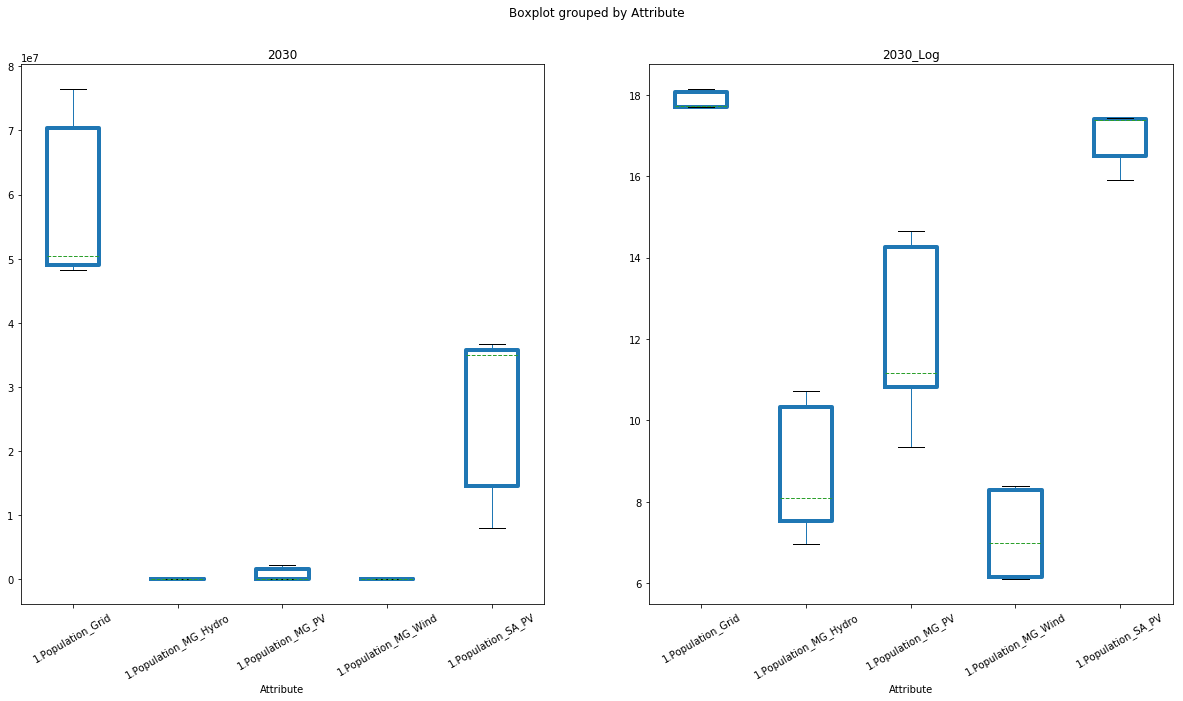

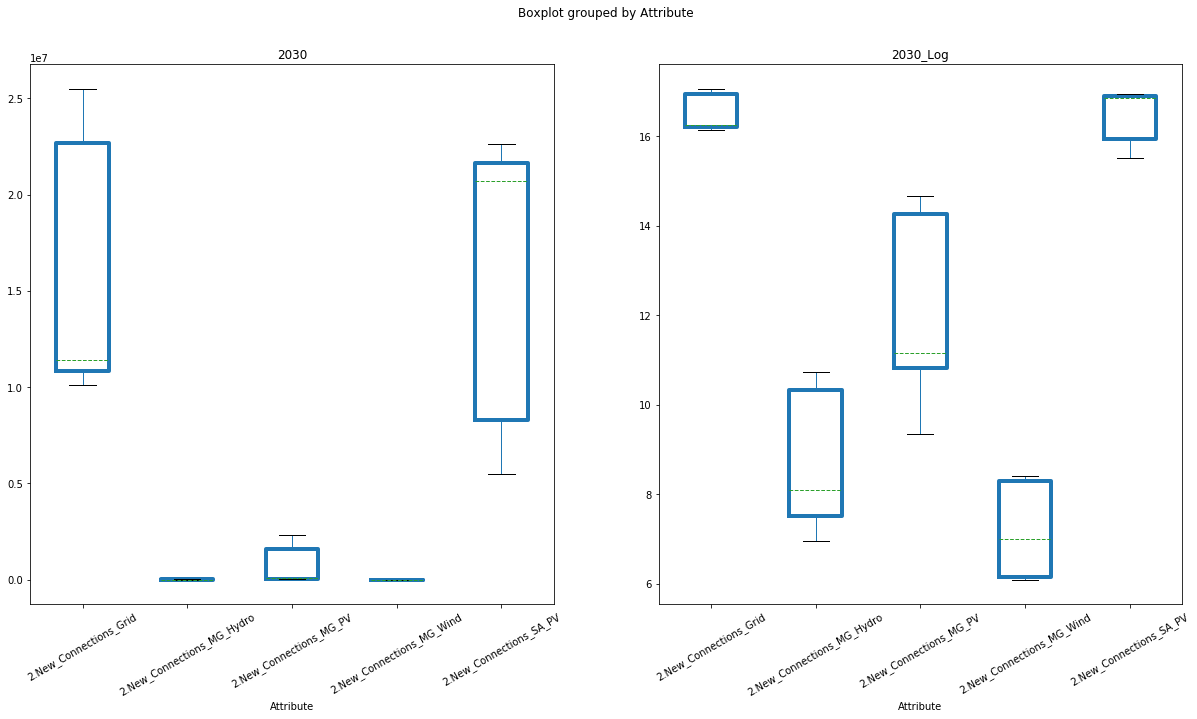

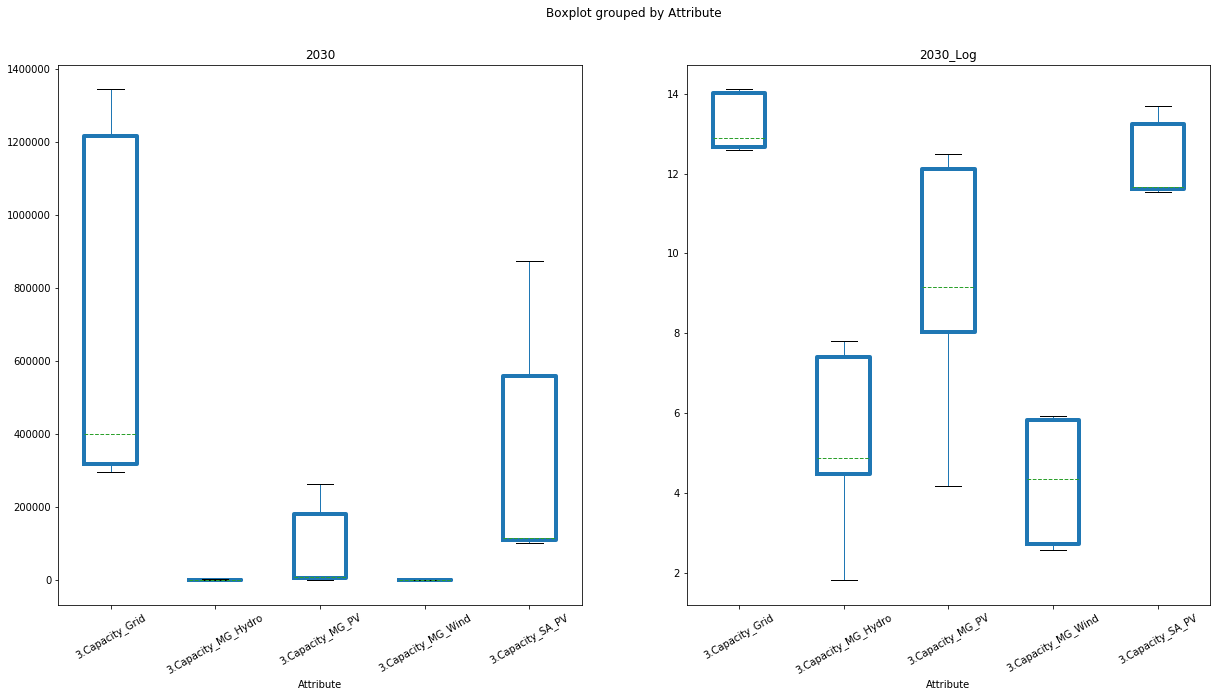

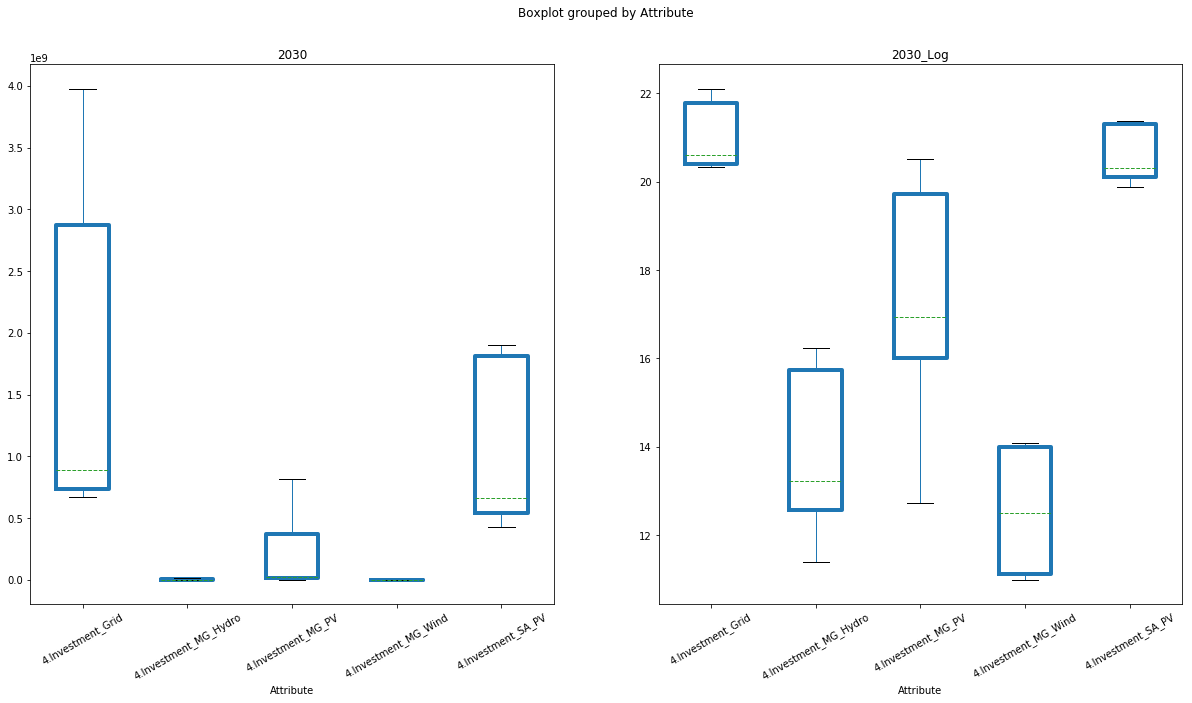

In [102]:
def box_plot(inD, selected_attribute, out_file):
    data_bad_idx = inD['2025'] == inD['2030']
    inD = inD[~data_bad_idx]
    inD['Attribute_Num'] = inD['Attribute'].apply(lambda x: x[:1])
    inD['bad_model'] = inD['Scenario'].apply(lambda x: int(x[-1:]))
    inD = inD[inD['bad_model'] == 0]
    inD['2030_Log'] = np.log(inD['2030'])


    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    red_square = dict(markerfacecolor='gray', marker='.')
    boxprops = dict(linestyle='-', linewidth=4, color='g')
    medianprops = dict(linestyle='--', linewidth=1, color='g')

    plotArgs = {'grid':False,
                'rot':30,
                'by':'Attribute', 
                #'sym':'.',
                'flierprops':red_square,
                'notch':False,
                'boxprops':boxprops,
                'medianprops':medianprops}

    regPlot = inD[inD['Attribute_Num'] == selected_attribute].boxplot('2030', ax=axes[0], **plotArgs)
    logPlot = inD[inD['Attribute_Num'] == selected_attribute].boxplot('2030_Log', ax=axes[1], **plotArgs)
    if not out_file == '':
        fig.savefig(out_file)
        def summarize_group(x):
            return(x.min(),x.mean(),x.max())

        res_grouped = res.groupby(['Attribute'])
        res_grouped[['2025','2030']].min().join(
        res_grouped[['2025','2030']].max(), rsuffix="_max").join(
        res_grouped[['2025','2030']].mean(), rsuffix="_mean")        
        pd.DataFrame(res_grouped).to_csv(out_file.replace('.png', '.csv'))
    return(inD)

countries = ['bi-1','rw-1','ug-1','ke-1','tz-1']
for country in countries:        
    inD = final.loc[final['Country'] == country]
    chart_folder = '/media/gost/DATA1/GEP/CHARTS/Box_Plot'
    for selected_attribute in ['1','2','3','4']:
        res = box_plot(inD, selected_attribute, f'{chart_folder}/boxPlot_{country}_{selected_attribute}.png')
        

In [140]:
wapp_data = pd.DataFrame(final[final['Country'].isin(WAPP)].groupby(['Attribute','Scenario']).sum())
wapp_data.reset_index(inplace=True)
wapp_data.head(10)

,Attribute,Scenario,2025,2030
0,1.Population_Grid,0_0_0_0_0_0,2.577570e+08,3.251196e+08
1,1.Population_Grid,0_0_0_0_0_1,2.641590e+08,3.096163e+08
2,1.Population_Grid,0_0_0_0_0_2,2.812843e+08,3.280308e+08
3,1.Population_Grid,0_0_0_0_1_0,2.587921e+08,3.340874e+08
4,1.Population_Grid,0_0_0_0_1_1,2.641590e+08,3.096163e+08
5,1.Population_Grid,0_0_0_0_1_2,2.812843e+08,3.280308e+08
6,1.Population_Grid,0_0_0_0_2_0,2.576221e+08,3.217630e+08
7,1.Population_Grid,0_0_0_0_2_1,2.641590e+08,3.096163e+08
8,1.Population_Grid,0_0_0_0_2_2,2.812843e+08,3.280308e+08
9,1.Population_Grid,0_0_0_1_0_0,2.577531e+08,3.247079e+08


/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


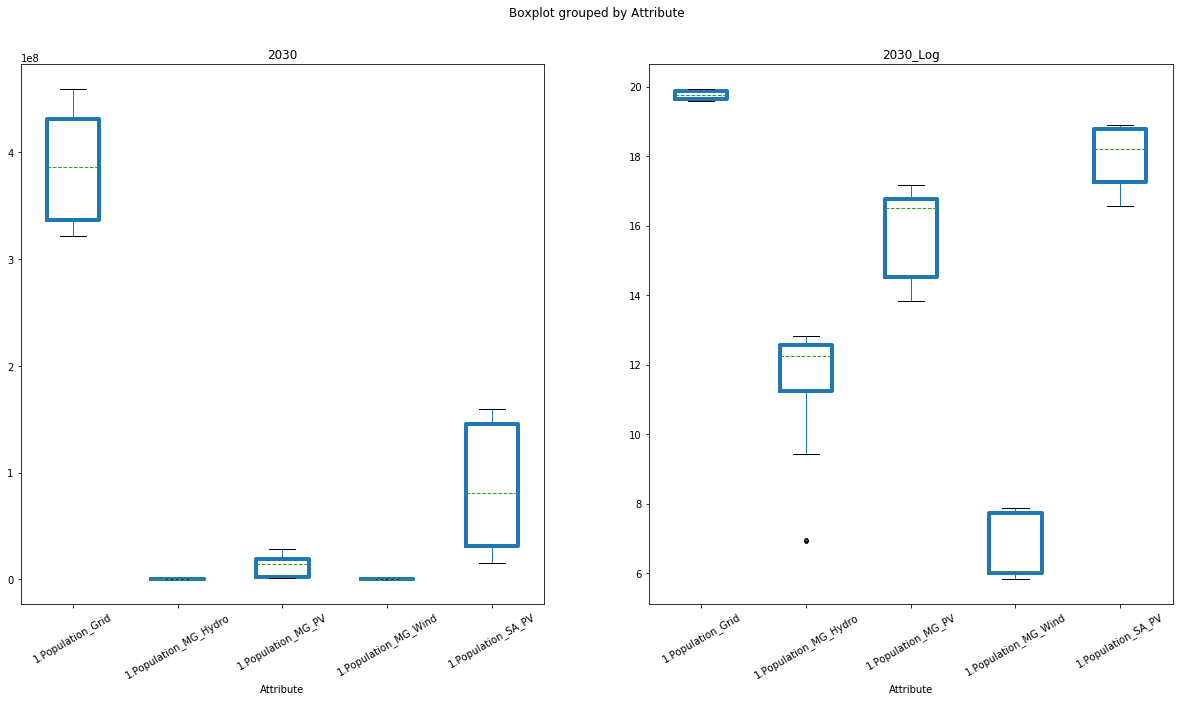

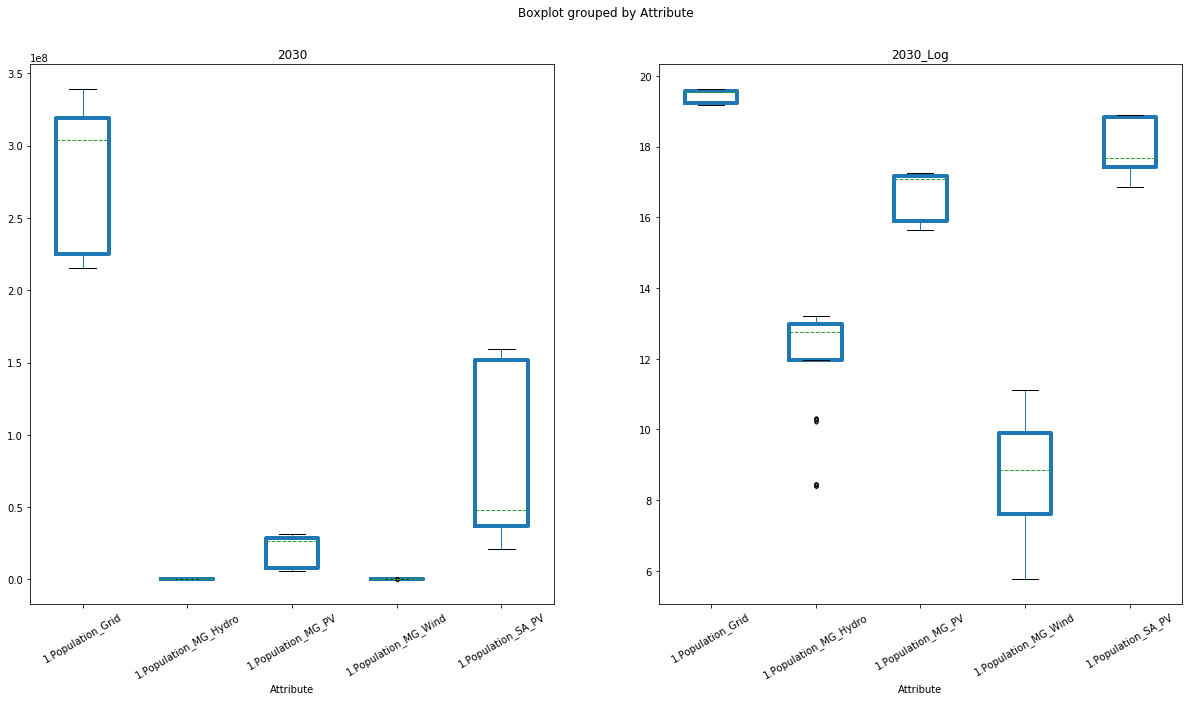

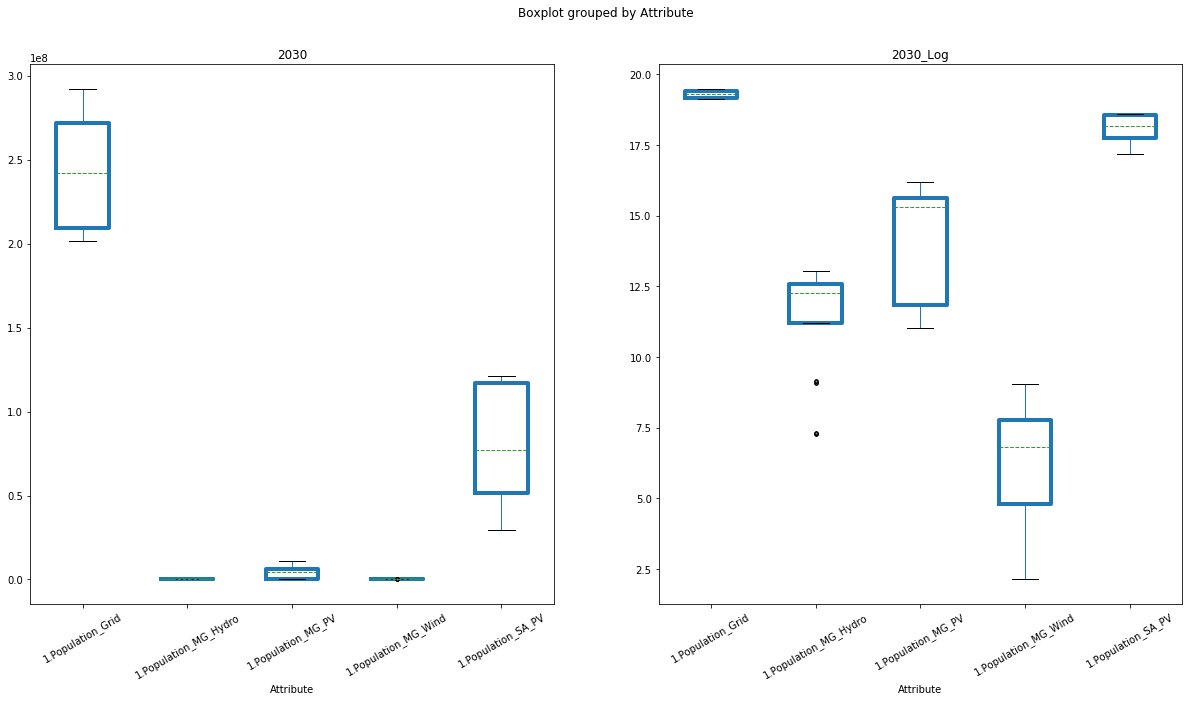

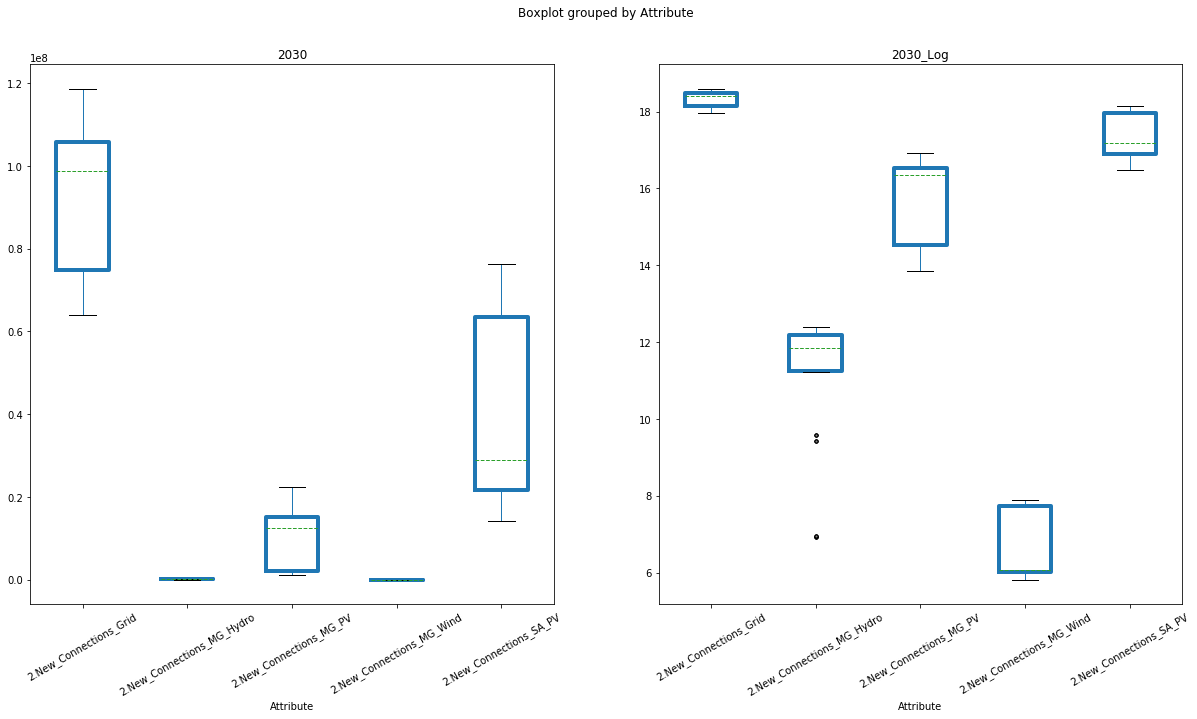

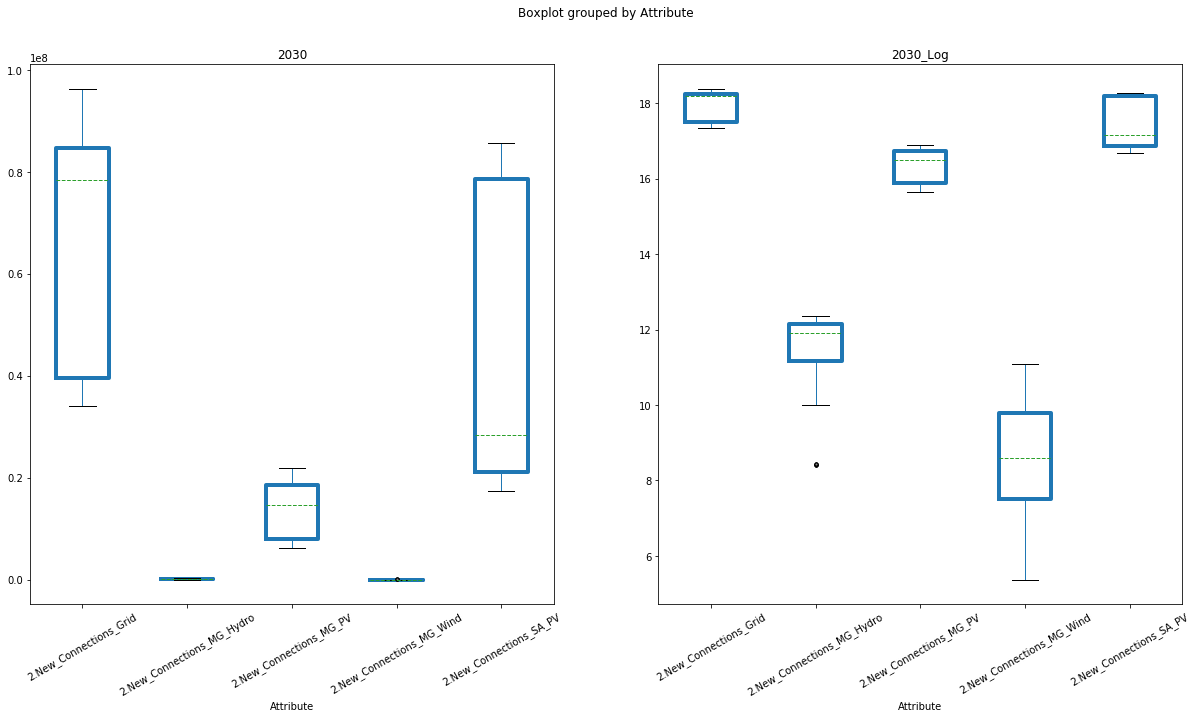

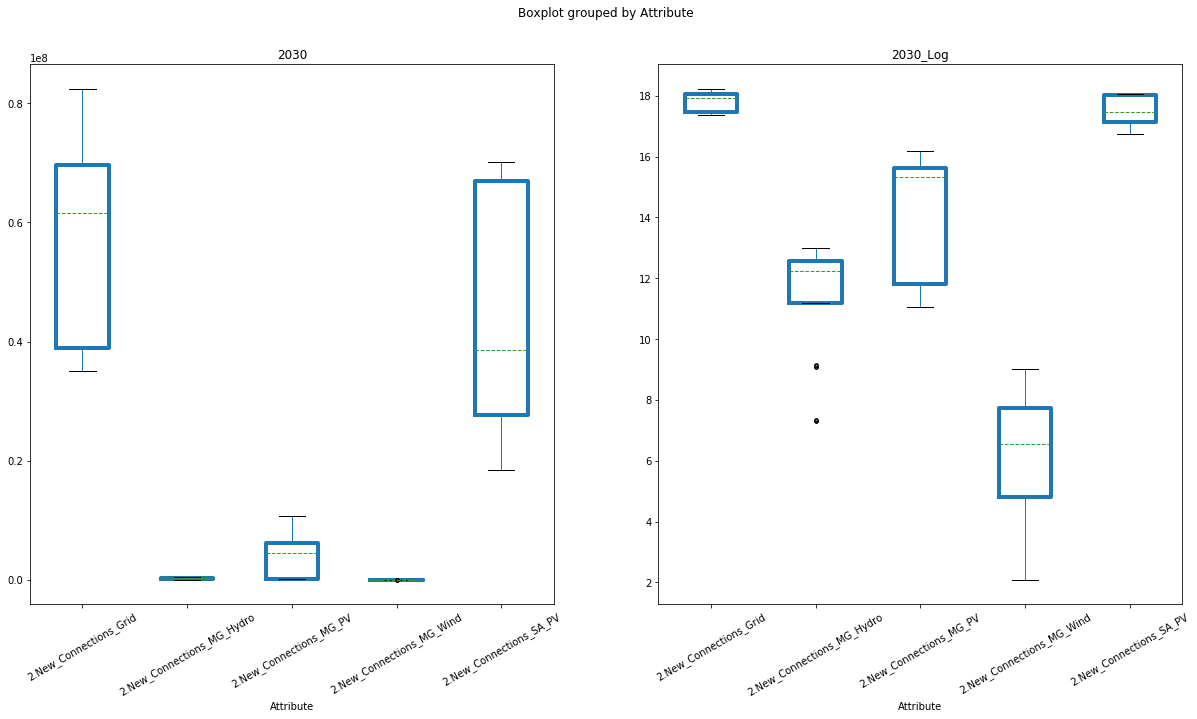

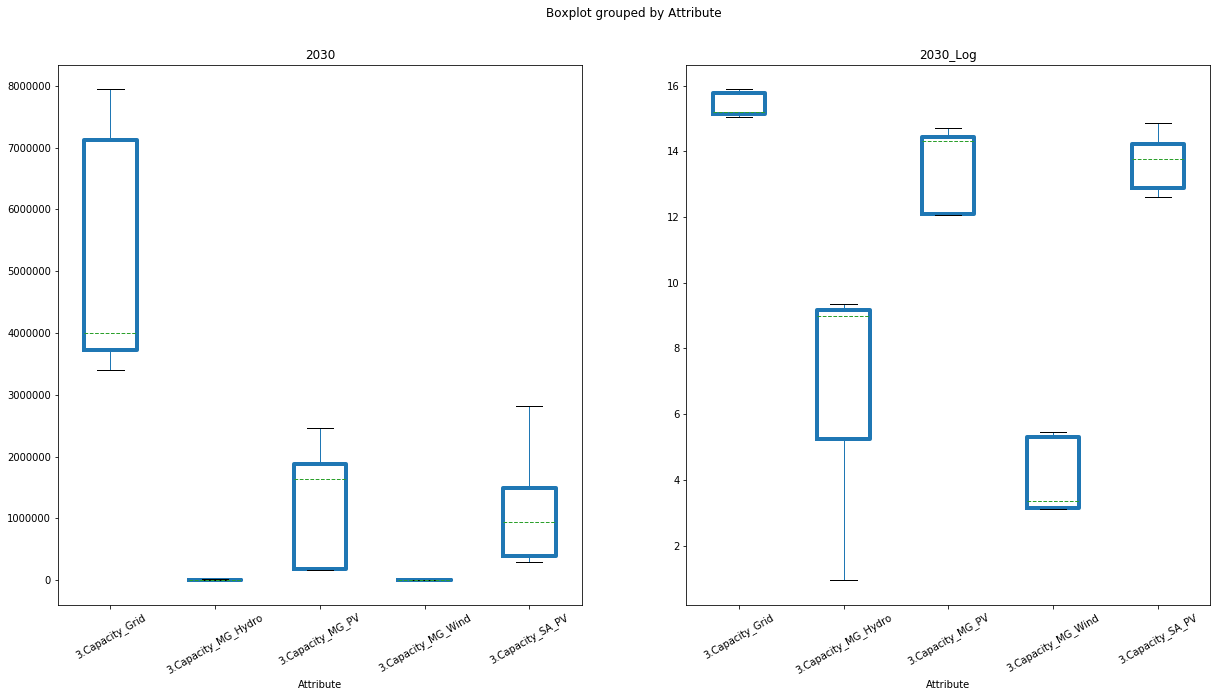

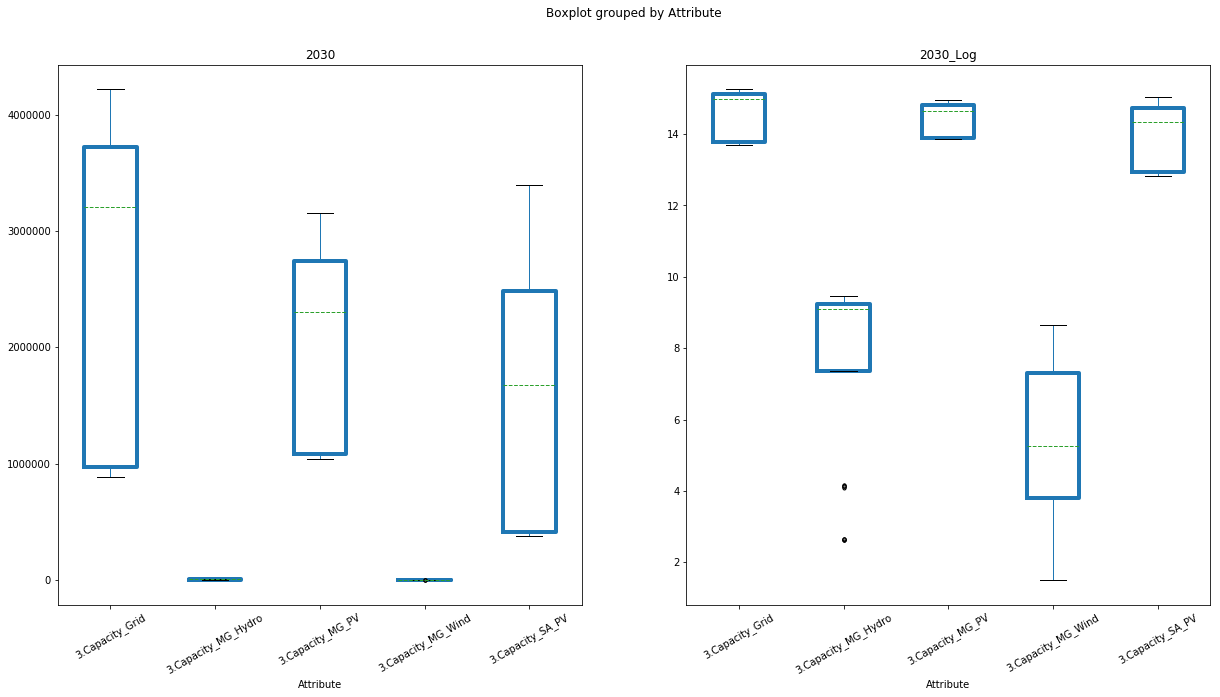

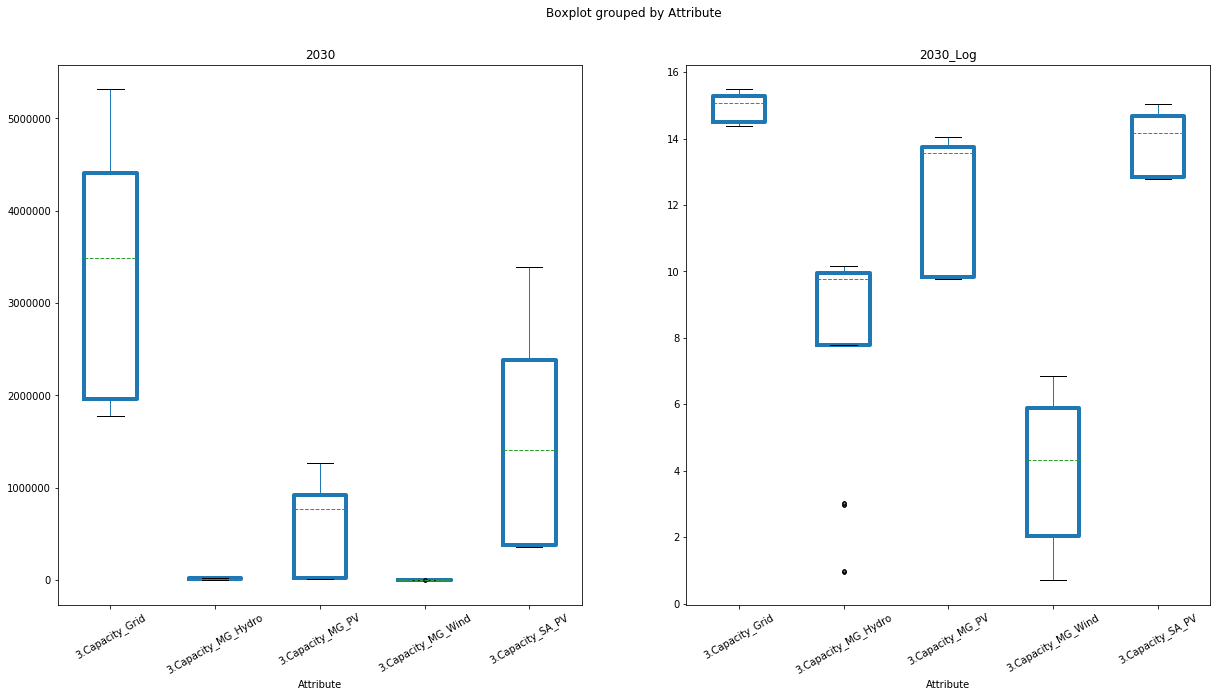

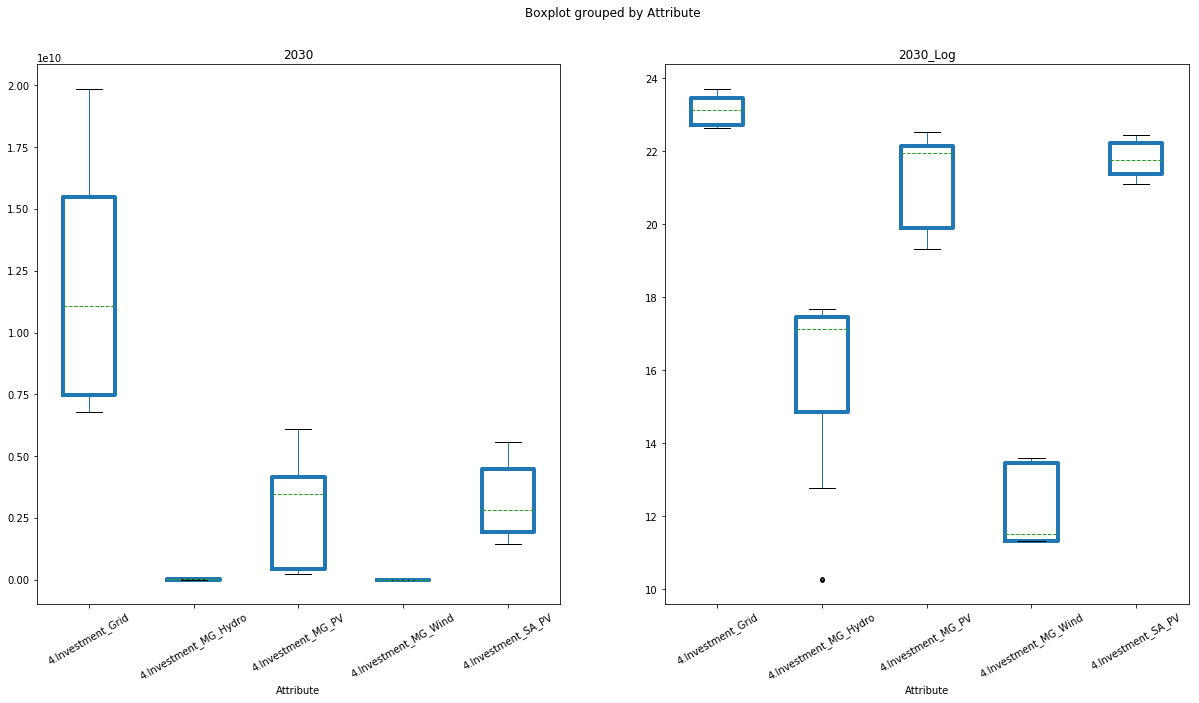

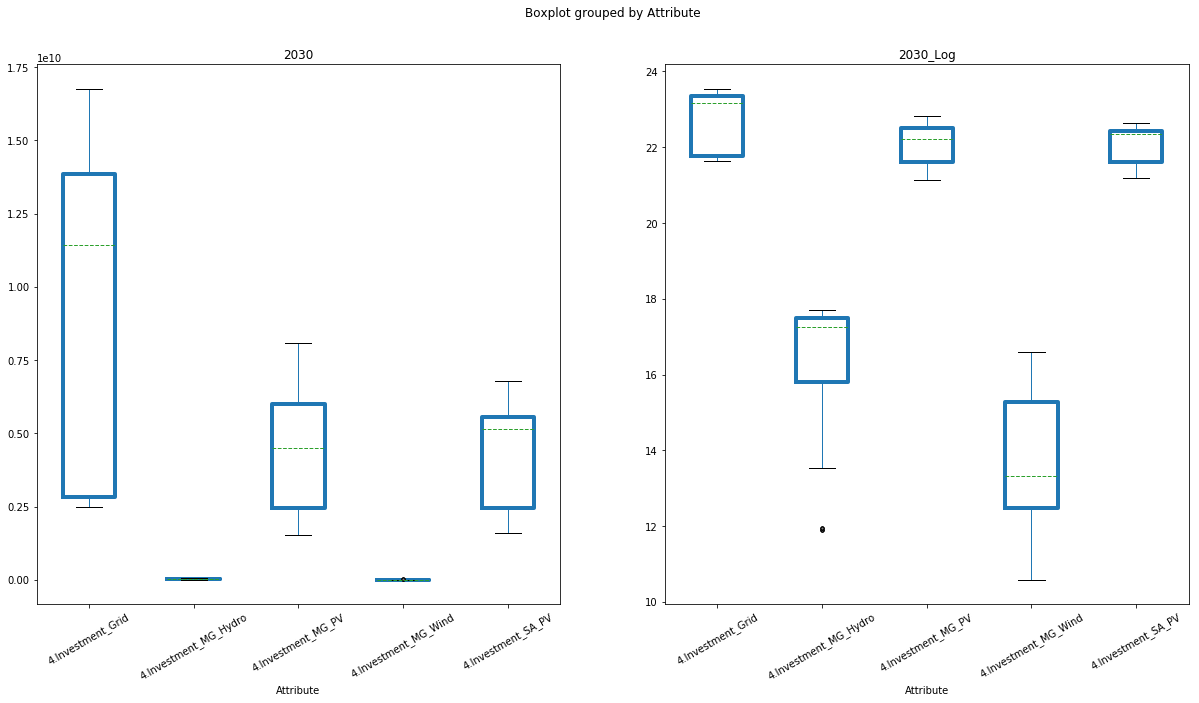

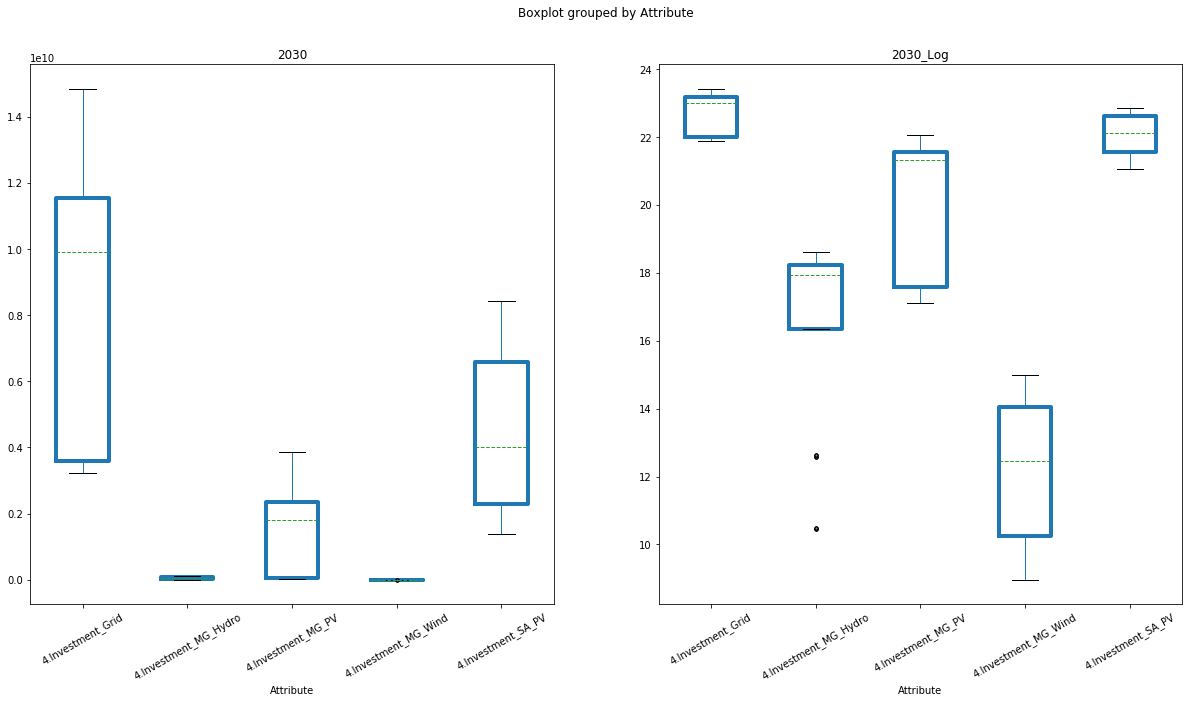

In [142]:
wapp_data = pd.DataFrame(final[final['Country'].isin(WAPP)].groupby(['Attribute','Scenario']).sum())
wapp_data.reset_index(inplace=True)
eapp_data = pd.DataFrame(final[final['Country'].isin(EAPP)].groupby(['Attribute','Scenario']).sum())
eapp_data.reset_index(inplace=True)
sapp_data = pd.DataFrame(final[final['Country'].isin(SAPP)].groupby(['Attribute','Scenario']).sum())
sapp_data.reset_index(inplace=True)

for selected_attribute in ['1','2','3','4']:
    res = box_plot(wapp_data, selected_attribute, f'{chart_folder}/boxPlot_WAPP_{selected_attribute}.png')
    res = box_plot(eapp_data, selected_attribute, f'{chart_folder}/boxPlot_EAPP_{selected_attribute}.png')
    res = box_plot(sapp_data, selected_attribute, f'{chart_folder}/boxPlot_SAPP_{selected_attribute}.png')

In [132]:
### Generate national summary table - as simple as possible
scenario = "0_1_0_0_0_0"
summaryData = final.loc[final['Scenario'] == scenario,]
#summaryData.loc[summaryData['2025'] != summaryData['2030'],]

# classify power pools
def get_pp(x):
    EAPP = [f'{x}-1' for x in ['bi','dj','eg','et','ke','ly','rw','sd','ss','ug']]
    WAPP = [f'{x}-1' for x in ['bf','bj','ci','gh','gm','gn','gw','lr','ml','ng','sl','sn','tg']]
    SAPP = [f'{x}-1' for x in ['ao','bw','ls','mw','mz','na','sz','tz','za','zm','zr','zw']]
    if x in EAPP:
        return('EAPP')
    if x in WAPP:
        return('WAPP')
    if x in SAPP:
        return('SAPP')

# Collapse MG and SA into rows
def get_tech(x):
    x_spl = x.split("_")
    if x_spl[-1] == "Grid":
        return("GRID")
    else:
        return(x_spl[-2])
    
summaryData['Attr'] = summaryData['Attribute'].apply(lambda x: x[:1])
summaryData = summaryData.loc[summaryData['Attr'] != 'M',]
summaryData['Tech'] = summaryData['Attribute'].apply(lambda x: get_tech(x))
summaryData['PP'] = summaryData['Country'].apply(lambda x: get_pp(x))

summary_grouped = summaryData.groupby(['Country','Attr','Tech'])
pd.DataFrame(summary_grouped.mean()).to_csv(f"{chart_folder}_country_breakdown.csv")

summary_grouped = summaryData.groupby(['PP','Attr','Tech'])
pd.DataFrame(summary_grouped.mean()).to_csv(f"{chart_folder}_PP_breakdown.csv")

/home/gost/anaconda3/envs/Geog/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [78]:
joined_data = pd.DataFrame(final.groupby(['Attribute','Scenario']).sum())
wapp_data = pd.DataFrame(final[final['Country'].isin(WAPP)].groupby(['Attribute','Scenario']).sum())
eapp_data = pd.DataFrame(final[final['Country'].isin(EAPP)].groupby(['Attribute','Scenario']).sum())
sapp_data = pd.DataFrame(final[final['Country'].isin(SAPP)].groupby(['Attribute','Scenario']).sum())
for selected_attribute in ['1','2','3','4']:
    for data_def in [[joined_data, "Africa"]]:
        x = data_def[0]
        x.reset_index()
        x['Attribute'] = [y[0] for y in x.index]
        x['Scenario'] = [y[1] for y in x.index]
        box_plot(x, selected_attribute, f'{chart_folder}/boxPlot_{data_def[1]}_{selected_attribute}.png')

TypeError: 'int' object is not subscriptable

2025          2030          Attribute  \
Attribute         Scenario                                                     
1.Population_Grid 0_0_0_0_0_0  1.122083e+09  1.344800e+09  1.Population_Grid   
                  0_0_0_0_0_1  1.179589e+09  1.330742e+09  1.Population_Grid   
                  0_0_0_0_0_2  1.239294e+09  1.395616e+09  1.Population_Grid   
                  0_0_0_0_1_0  1.125912e+09  1.364751e+09  1.Population_Grid   
                  0_0_0_0_1_1  1.179589e+09  1.330742e+09  1.Population_Grid   

                                  Scenario  
Attribute         Scenario                  
1.Population_Grid 0_0_0_0_0_0  0_0_0_0_0_0  
                  0_0_0_0_0_1  0_0_0_0_0_1  
                  0_0_0_0_0_2  0_0_0_0_0_2  
                  0_0_0_0_1_0  0_0_0_0_1_0  
                  0_0_0_0_1_1  0_0_0_0_1_1

In [12]:
# Create bar charts with error bars for all scenarios
inD = final[final['Country'] == 'bi-1']
selected_attribute = '1'
selected_index = [x for x in inD.Attribute if (x[:1] == selected_attribute)]
selected_data = inD.loc[inD['Attribute']selected_index]
data_bad_idx = selected_data['2025'] == selected_data['2030']
selected_data = selected_data[~data_bad_idx]


KeyError: "None of [Index(['1.Population_Grid', '1.Population_SA_Diesel', '1.Population_SA_PV',\n       '1.Population_MG_Diesel', '1.Population_MG_PV', '1.Population_MG_Wind',\n       '1.Population_MG_Hydro', '1.Population_MG_Hybrid', '1.Population_Grid',\n       '1.Population_SA_Diesel',\n       ...\n       '1.Population_MG_Hydro', '1.Population_MG_Hybrid', '1.Population_Grid',\n       '1.Population_SA_Diesel', '1.Population_SA_PV',\n       '1.Population_MG_Diesel', '1.Population_MG_PV', '1.Population_MG_Wind',\n       '1.Population_MG_Hydro', '1.Population_MG_Hybrid'],\n      dtype='object', length=1728)] are in the [index]"

In [11]:
inD.head()

,Attribute,2025,2030,Country,Scenario
0,1.Population_Grid,2.798588e+06,3.863232e+06,bi-1,0_0_0_0_0_0
1,1.Population_SA_Diesel,0.000000e+00,0.000000e+00,bi-1,0_0_0_0_0_0
2,1.Population_SA_PV,5.750582e+06,1.193562e+07,bi-1,0_0_0_0_0_0
3,1.Population_MG_Diesel,0.000000e+00,0.000000e+00,bi-1,0_0_0_0_0_0
4,1.Population_MG_PV,0.000000e+00,0.000000e+00,bi-1,0_0_0_0_0_0


In [ ]:
xLabels[0].split("_")[0]

In [ ]:
resultsFolder = "/media/gost/DATA1/GEP/Summaries/"
shapesFolder = "/media/gost/DATA1/GEP/Clusters"
outFolder = "/media/gost/DATA1/GEP/Summaries_Summary"
allSummaries = {}
submittedCountries = os.listdir(resultsFolder)
#submittedCountries = ['zw-1']
for focalCountry in submittedCountries:
    '''try:
        
        xx.extractSummaries()
    except:
        print("Error Processing %s" % focalCountry)'''
        
    try:
        xx = gepResults("", resultsFolder, focalCountry)
        summary = xx.processSummaryResults() 
        allSummaries[focalCountry] = summary
        summary.to_csv(os.path.join(outFolder, "%s-summary.csv" % focalCountry))
    except:
        print("Error Summarizing %s" % focalCountry)

In [ ]:
maxVals = []
rangeVals = []
for key, values in allSummaries.items():
    cVals = list(values['MaxVal'])
    cVals.append(key)
    maxVals.append(cVals)
    cVals = list(values['Range'])
    cVals.append(key)    
    rangeVals.append(cVals)

columnNames = list(values.index)
columnNames.append("Country")
maxDF = pd.DataFrame(maxVals, columns = columnNames)
rangeDF = pd.DataFrame(rangeVals, columns = columnNames)

In [ ]:
maxDF.to_csv("%s_maxVals.csv" % outFolder)
rangeDF.to_csv("%s_rangeVals.csv" % outFolder)